# Analysing gravitational wave signals
## Mini Project (worth 40%)

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated masses, that propagate as waves outward from their source at the speed of light.  They are predicted in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of the merging objects and their distance from us to the observed waveform.  This will allow us to determine the nature of the orbiting objects that merged to form the gravitational wave using MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects coalesce. The strain describes the amplitude of the wave. The system is parameterised by the masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.  

Other useful parameters are:

The mass ratio $q=M_2/M_1$, with convention that $M_1 \ge M_2$ and so $q \le 1$.

The "Chirp mass", which is a quantity used in general relativity, is given by:

$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}$$

**General tips:**

- Explain all your reasoning for each step. A significant fraction of the marks are given for explanations and discussion, as they evidence understanding of the analysis.
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements in the cell below to the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part A- Some background [20 marks]

* **(i)** How do astronomers know that the gravitational waves from the GW150914 event was due to two black holes merging?  <font color="blue">**[5 marks]**</font>

* **(ii)** Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event. <font color="blue">**[5 marks]**</font>
 
* **(iii)** The file CA3_gravitationalwaveevents.csv contains the properties of previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass of the merging sources against their distance.   <font color="blue">**[10 marks]**</font>

**Answer:**

i) Gravtational wave astronomers believe that recovered GW150914 signal was created by a binary black hole merger, they use a system called matchfiltering. This method uses a database of generated wave forms (with out pressetional aspects) to overlay the data and find the waveform that provides the most probalistic match. From this they then use a system called lalinference (nested alogrithm) to recover the parameters of the system. when GW150914 was detected the recovered parameters were 36Mʘ(error +5 -4) and 29Mʘ (error +4 -4). Due to the size of the recoved masses they are far to large that it could only be from a black hole merger. 

ii) So a waveform can be broken down in to 3 aspects, these are inspiral, merger and ringdown. when creating the waveform tempates, they use post newtionan expasion to describe the inspiral till about ~10 orbits before merger, then numerial solutions to eistiens non-linear equations are used till the merger. Then lastly for the ring down aspect they use a damping affect.

iii) As seen in the graph the larger the distance the larger the error in the recovered parameters.

Text(0, 0.5, 'Dl')

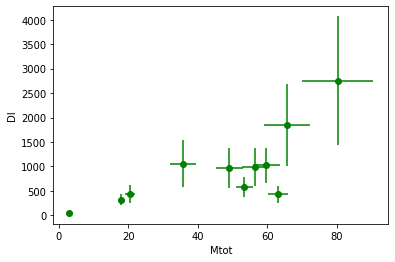

In [122]:
import numpy as np
import matplotlib.pyplot as plt

Mtot = [63.1,35.7,20.5,49.1,17.8,80.3,56.4,53.4,2.8,59.8,65.6]
Mtot_err = [-3,-3.8,-1.5,-3.9,-0.7,-10.2,-3.7,-2.4,0,-3.8,-6.6]
Dl = [430,1060,440,960,320,2750,990,580,40,1020,1850]
Dl_err = [-170,-480,-190,-410,-110,-1320,-380,-210,-10,-360,-840]
plt.errorbar(x=Mtot, y=Dl, xerr=Mtot_err, yerr=Dl_err, fmt='o', color='g')

plt.xlabel('Mtot')
plt.ylabel('Dl')

## Part B - The data [15 marks]

Now it is your turn to look at observations and measure the mass and distance of the merging system. We first need to access the observational data measured with the gravitational wave detectors (the waveform observed when two compact, dense astrophysical objects coalesce), and format it correctly.

* **(i)** Read in the datafile of the observed waveform `Dataset1.csv`. These files store the strain as a function of "GPS time" for the merger of two bodies. <font color="blue">**[5 marks]**</font>

* **(ii)** The GPS time of the merger for your waveform is 1205951542.153363.  Your data will need to be shifted so that the merger occurs at time = 0 secs.  This is required for when we compare model waveforms with our data. <font color="blue">**[4 marks]**</font>

* **(iii)**The final data step is that we need to estimate the average noise and standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform. <font color="blue">**[6 marks]**</font> 

**Answer:**

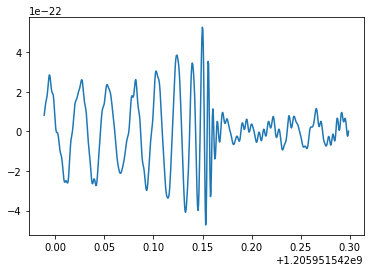

In [135]:
import csv
import numpy as np
import pylab as plt

with open('/home/cot12/Downloads/Dataset1.csv') as csvfile:   # open csv file
    readcsv = csv.reader(csvfile, delimiter = ',') # read file 
    datax = []
    datay = []
    for row in readcsv:
        x = row[0]
        y = row[1]
        datax.append(x)
        datay.append(y)
    datax.pop(0)
    datay.pop(0)

strain = np.array(datax, dtype = float)
time = np.array(datay, dtype = float)
plt.plot(time, strain)

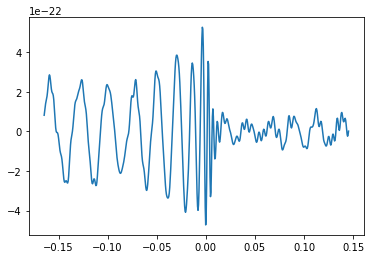

In [136]:
new_time = time - 1205951542.153363
plt.plot(new_time, strain)

In [176]:
# so the the parameter recovery is done within the inspiral so to calculate our average noise
# we will use the first 3 peaks and use peak to peak analyse to determine the average noise

import csv
import numpy as np
import pylab as plt
from scipy.signal import find_peaks

w = find_peaks(strain)
list = []
list.append(strain[w[0][0]])
list.append(strain[w[0][2]])
list.append(strain[w[0][4]])
peaks = np.array(list, dtype = float)
peaks_max = np.max(peaks)
peak_sum = np.sum(peaks)

## Part C - Using model waveforms to roughly estimate the total mass of two objects and distance to the system [28 marks]

Now that we have some data, we ideally want to try and compare predicted waveforms for a merger with our observed waveform and use this to derive the mass and distance to the merger.  

Model waveforms are known as **templates** in the gravitational wave community.  In this part of the question we will attempt to produce a waveform for different masses and distances using a reference waveform and scaling it by its change in distance and mass. 

The reference waveform/template we will use is```reference_Mtot40.0Msun_q1.00_Dist1.0Mpc_f_lower10Hz.csv```. This file shows the strain as a function of time (with $t=0$ at the merger) of a system with total mass of the merging objects as $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$. The template has been generated with a lowest frequency of $f_{\rm low}=10$Hz.  

If we have an equal-mass system (i.e $q=1$) with total mass $M=M_1 + M_2$ at a distance $D$, then we can scale the strain of a waveform, $h(t,M,D)$ from a reference waveform with $M^\prime,D^\prime$ as:

$$
h(t,M,D) = \left(\dfrac{M}{M^\prime}\right) \left(\dfrac{D^\prime}{D}\right) ~ h(t^\prime) ~~~~~~~~~[Eq.~1]
$$

where: 

$$ t^\prime=\left(\dfrac{M^\prime}{M}\right)t ~~~~~~~~~[Eq.~2] $$

and $t=0$ is defined as being the time at which the merger occurred.

Note that the templates will have different time sampling rates to your observed data as they are model waveforms.

You will need to include the following steps when answering this question:

* **(i)** Open the template file using the `pandas` package. Write a function in python to scale the time and strain of any waveform with $q=1$, total mass $M$ and distance $D$ from a reference waveform using Equations~1 and 2. In this work we will use the parameters $M=40 M_{sun}$ and $D=1$Mpc for our reference/template waveform. <font color="blue"> **[10 marks]**</font> 
 
* **(ii)** Test your function from part (i) works by subsituting in parameters $M=70\,M_{sun}$ and $D=5$Mpc, and comparing the waveform you produce using your python function with the model template file generated for $M=70\,M_{sun}$ and $D=5$Mpc: `reference_Mtot70.0Msun_q1.00_Dist5.0Mpc_f_lower10Hz.csv`.  Comment on your result <font color="blue"> **[10 marks]** </font>
 
* **(iii)** Use your function to scale the template waveform ($M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$) in mass and distance to make an initial rough estimate "by eye" of the total mass and distance that fit your data (e.g. to within +/- 5 Msun, +/- 100 Mpc). <font color="blue"> **[8 marks]**</font>

**Answer:**
I havent used Pandas because we just dont agree, sorry

Text(0, 0.5, 'Strain')

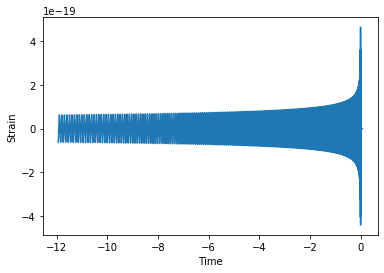

In [185]:
import csv
import numpy as np
import pylab as plt

with open('/home/cot12/Downloads/reference_Mtot40.0Msun_q1.00_Dist1.0Mpc_f_lower10Hz.csv') as csvfile:   # open csv file
    readcsv = csv.reader(csvfile, delimiter = ',') # read file 
    datax = []
    datay = []
    for row in readcsv:
        x = row[0]
        y = row[1]
        datax.append(x)
        datay.append(y)
    datax.pop(0)
    datay.pop(0)

old_strain = np.array(datax, dtype = float)
old_time = np.array(datay, dtype = float)
plt.plot(old_time, old_strain)
plt.xlabel('Time')
plt.ylabel('Strain')

Text(0, 0.5, 'Strain')

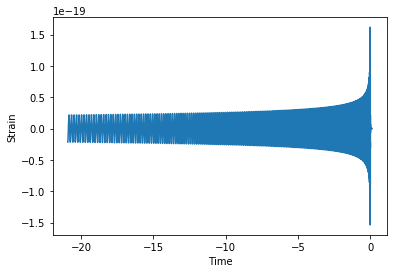

In [186]:
def scale_time(New_mass, old_mass, oldtime_array):
    q = New_mass/old_mass
    t_array = oldtime_array*q
    return t_array

def new_strain(New_mass, old_mass, old_dis, New_dis, old_strain):
    q = New_mass/old_mass
    dis_q = old_dis/New_dis
    ratio = q*dis_q
    new_strain = ratio*old_strain
    return new_strain

time_dash = scale_time(70, 40, old_time)
strain_dash = new_strain(70, 40, 1, 5, old_strain)
plt.plot(time_dash, strain_dash)
plt.xlabel('Time')
plt.ylabel('Strain')

Text(0, 0.5, 'Strain')

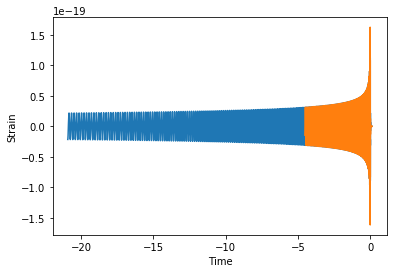

In [187]:
with open('/home/cot12/Downloads/reference_Mtot70.0Msun_q1.00_Dist5.0Mpc_f_lower10Hz.csv') as csvfile:   # open csv file
    readcsv = csv.reader(csvfile, delimiter = ',') # read file 
    data_x = []
    data_y = []
    for row in readcsv:
        xx = row[0]
        yy = row[1]
        data_x.append(xx)
        data_y.append(yy)
    data_x.pop(0)
    data_y.pop(0)

strain_M70 = np.array(data_x, dtype = float)
time_70M = np.array(data_y, dtype = float)


plt.plot(time_dash, strain_dash)
plt.plot(time_70M, strain_M70)
plt.xlabel('Time')
plt.ylabel('Strain')


So as you can see our scaled strain matchs although our scaled wave has a longer inspiral, but this is probaly because our new wave has a much larger distance so its early inspiral might be out of ligo's sensativity.

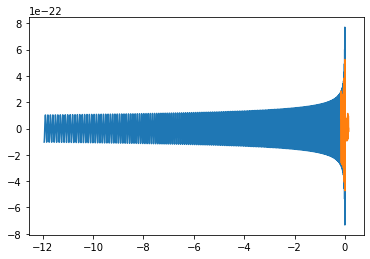

In [262]:
time_dash = scale_time(40, 40, old_time)
strain_dash = new_strain(40, 60, 1, 400, old_strain)
plt.plot(time_dash, strain_dash)
plt.plot(new_time, strain)

In [257]:
# above is the best I could get

## Part D - Interpolate the data  [13 marks]

We now need to make a function that will interpolate over our data waveform and allow us to produce an observed waveform with the same time sampling as the template waveform.   This will be crucial for comparing our data (ie our observations) with the templates (ie our model) at each time step later on. Here we will also consider only the time range for which we have data.

* **(i)** Our data waveform starts at some time $t$. Find out what this is.  Next, take your observed data waveform and only output data for $t$ > $t_{\rm min} \rm (data)$ and $t$ < $0$ (ie only keep information for times $\le 0$ (before the merger), or for times where there is data).  Verify, by plotting, that your new observed waveform only has data in this restricted time range. <font color="blue"> **[5 marks]**</font>

* **(ii)** OK, final step before we get onto to estimating the total mass of the system. To estimate the difference between our observed waveform and model/template waveforms, we now need to put both observed and template waveforms on the same time sampling.  To do this we need to interpolate between our observed data so that we can find an observed strain for each time step and compare it to the predicted strain for the same timestep from our scaled model. Verify this works via plotting or checking the length of the original data array and the new interpolated data array. <font color="blue"> **[8 marks]**</font>

*Hints:*
 * *For (i), one can use the following code example  `index = np.where((data_old > 5)&(data_old<10))[0]`. In simple terms, this type of statement returns a list of indices (`index`) where the conditions in the bracket have been met. One can then use `data_old[index]` to pull out the `data_old` numbers that satisfy the conditions.*
 * *For (ii), you should use interpolation, such as that created by ```scipy.interpolate.interp1d```. You can use the following code to do this. If x[index] and y[index] are the observed data from the previous steps, then `interp_fn =interp1d(x[index],y[index],bounds_error=False)`will create an interpolation object of the data and `new_data_y = interp_fn(scaled_template_time)` will take the time values from the scaled template, and output a value for the observed data for each time step of the template.* 

**Answer**

-0.1646575927734375


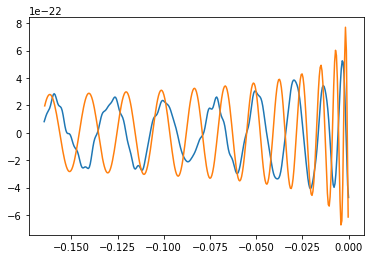

In [263]:
z = new_time[0]
print(z)
new_times_temp = []
new_strain_temp = []
for ii in range(0, time_dash.shape[0]):
    if z <= time_dash[ii] <= 0 :
        new_times_temp.append(time_dash[ii])
        new_strain_temp.append(strain_dash[ii])

new_times_obs = []
new_strain_obs = []
for pp in range(0, new_time.shape[0]):
    if new_time[pp] <= 0.000:
        new_times_obs.append(new_time[pp])
        new_strain_obs.append(strain[pp])
        
plt.plot(new_times_obs, new_strain_obs)
plt.plot(new_times_temp, new_strain_temp)

*Your answer here*

## Part E - Estimating the best fit total mass using MCMC [55 marks]

Here we will derive the best fitting total mass for the two bodies that collided to produce the wave we see in our data using an MCMC approach.  We will take our "by-eye" estimate of the distance above and then use MCMC to derive the total mass of the system.   We will be comparing the observed waveform with the reference waveform (40$M_{\rm sun}$, D=1Mpc from earlier) (the model) so think carefully about what the likelihood function will be in this case (see Chapters 5-8).  

For this question, the following steps will be needed:
 * **(i)** Use MCMC to sample the total mass, $M$, to produce a best-fit value for your data.  <font color="blue">**[25 marks]**</font>
 * **(ii)**  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC.  <font color="blue">**[20 marks]**</font>
 * **(iii)**  Report the median and 90% credible limits on your value of $M$.  <font color="blue">**[10 marks]**</font>
 
You may assume that:
 * the noise is white and described by a Gaussian distribution, 
 * the total mass is in the range [20,100] $M_{sun}$.
 
_Hints:_
 * _To compare the model template with the data, we will need to have both the reference waveform and the observed data produced for the same time steps and time range. We can do this by interpolating and setting the range of time we want to compare to. An example of interpolating in python is given by_ `data_interp=interp1d(data_time,data_strain,bounds_error=False)`

 * _You should work with "log(Likelihood)" to avoid numerical errors  - note this will affect both your posterior and the step in the MCMC chain where we usually write $p_{\rm proposed}/p_{\rm current}$_

 * _Think very carefully about the form of your likelihood since here we are comparing observed data with a model when the total mass $M$ is changed  _
 
 * _make sure that the calculations within each step are as quick as possible, so perform as much computation as possible "outside" the MCMC_
 
 * _The step size between samples of the MCMC is quite important. A suggested value is $0.1\,M_{sun}$_
 
 * _Test your MCMC on a small number of samples (e.g. 100) before trying it with a larger number (e.g. $10^5$ or $10^6$)_
 
 * _At the end, ask yourself if you need to include every sample?_
 
 * _Depending on your step size, this part can take a long time to run. Move all your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command. To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):_
 
`from datetime import datetime,timedelta`

`tstart=datetime.now()`

`print('start time:',tstart)`

`preddur=[Nsteps*0.01,Nsteps*0.02]`

`print('predicted duration: {}-{}s'.format(preddur[0],preddur[1]))`

`predtend=[tstart+timedelta(seconds=preddur[0]),tstart+timedelta(seconds=preddur[1])]`

**Answer:**

*Your answer here*



### Part F - Estimating mass and distance using MCMC for the merging system [37 marks]

Repeat your MCMC analysis to now estimate the total mass, $𝑀$, *and* the distance, $𝐷$. 

 * **(i)** Use MCMC to get $M$ and $D$.  <font color="blue">**[15 marks]**</font>
 * **(ii)**  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC.  <font color="blue">**[10 marks]**</font>
 * **(iii)**  Report the median and 90% credible limits on your value of $M$ and compare your best fit waveform with the data. Comment on your result.  <font color="blue">**[12 marks]**</font>
 
 Note if there are any difficulties completing this component of the coursework, you can still attempt Part G using your by-eye estimates for $M$ and $D$ from Part C, or your $M$ from the MCMC from Part E and your by eye estimate for $D$ in Part C.

_Hints:_
 * *Now your theta_current for the MCMC will have 2 values (Mtot and D) as such you will need to specify 2 initial parameters for theta_current. Whereas before you may have used something like `theta_current.append([Mtot_guess])`, now you will need something like `theta_current.append(np.array([Mtot_guess,D_guess]))` and similarly your `D_theta` will need to have 2 values to tell the MCMC to take a random step in both Mtot and D values in each step of the MCMC.*
 * *Be careful not to get caught up in messy arrays - if in doubt run the MCMC for 5-10 steps and print out the theta_current to check your theta_current[0] ends up looking like it should (ie first element = initial parameters you set up, next elements either the same as before or changed to proposed theta values). If in doubt, ask for help at the weekly exercise classes.*

**Answer:**

*Your answer here*

## Part G - Putting it all together [32 marks]

You have now measured the total mass for your colliding astrophysical objects and the distance. 

 * **(i)** Calculate the chirp mass for your system and the individual masses of your merging bodies. Comment on your individual masses. <font color="blue">**[5 marks]**</font>

 * **(ii)** Plot your MCMC derived properties alongside the previously discovered gravitational wave systems. <font color="blue">**[5 marks]**</font>
 
 * **(iii)** Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular before the peak amplitude in the wave is reached, estimate the orbital separation in km of the two bodies around peak amplitude.   Think carefully about how the orbital period is related to the period of your gravitational wave. <font color="blue">**[18 marks]**</font>
 * **(iv)** Comment on what your analysis suggests are the best astrophysical candidates for the merging objects? <font color="blue">**[4 marks]**</font>


**Answer:**

*Your answer here*

